In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install opencv-python

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

Reading and Displaying Images

In [5]:
img = cv2.imread("./doge_photo2.jpeg")

In [6]:
type(img)

numpy.ndarray

When you read image from cv2 , it read in a form of BGR while when you read image with matplotlib , it read channel as RGB.

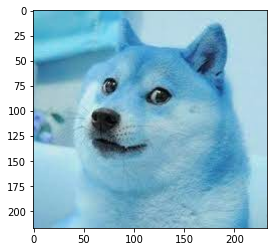

In [7]:
plt.imshow(img)
plt.show()

YOu can open image using cv also but it will take some time and it will open the image in a new window.

In [8]:
#cv2.imshow("Doge Image", img)
#cv2.waitKey(3000)
#cv2.destroyAllWindows()

In [9]:
#cv2.destroyAllWindows()

In [10]:
%matplotlib inline
# To show images here itself rather than in a other window

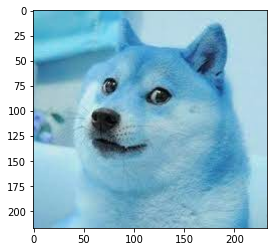

In [11]:
plt.imshow(img)

In [12]:
#cv2.imshow("Doge Image", img)
#cv2.waitKey(3000)
#cv2.destroyAllWindows()
#If you execute the above line, It will open the images in a new window and kernel will die.So,
# better to open using "plt.imshow()" or I think, "%matplotlib inline" also helps it.

In [13]:
# %matplotlib 
# Mac people need to execute this and this is not needed for windows.

# Changing Colorspaces :

In [14]:
img.shape

(217, 233, 3)

In [15]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb.shape

(217, 233, 3)

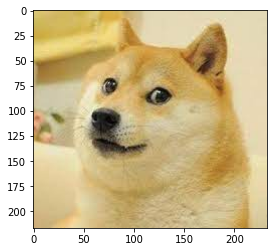

In [16]:
plt.imshow(img_rgb)

In [17]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [18]:
img_gray.shape

(217, 233)

You can see that there is no third channel in the greyScale image. Grey Scale images donot have any third channel .

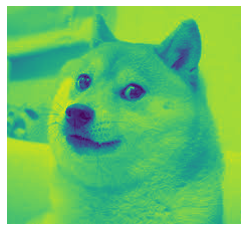

In [19]:
plt.imshow(img_gray)
plt.axis('off')
plt.show()

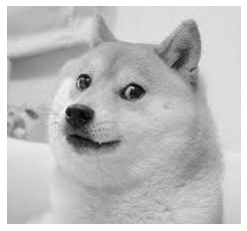

In [20]:
#here, cmap means colorMap
plt.imshow(img_gray, cmap = "gray")
plt.axis('off')
plt.show()

In [21]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

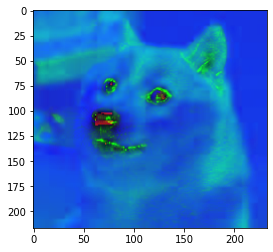

In [22]:
plt.imshow(img_hsv)
plt.show()

# Image Resizing :-

In [23]:
img_rgb.shape

(217, 233, 3)

In [24]:
resized_img = cv2.resize(img_rgb, (500,500))

In [25]:
resized_img.shape

(500, 500, 3)

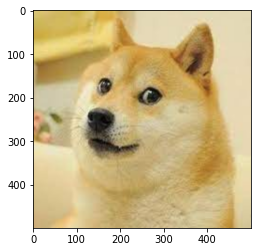

In [26]:
plt.imshow(resized_img)
plt.show()

"Resizing" is not same as "reshaping" of images.

In [27]:
# Blurring :
img_blur = cv2.blur(img_rgb, (3,3))
#here (3,3) means kernel will blurr the image as patches of (3*3) pixel matrix.

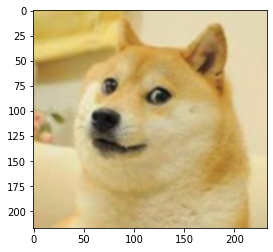

In [28]:
plt.imshow(img_blur)
plt.show()

In [29]:
img_blur = cv2.blur(img_rgb, (20,20))

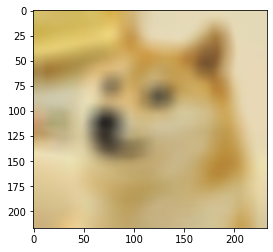

In [30]:
plt.imshow(img_blur)
plt.show()

Image Rotation :-

In [31]:
img_rgb.shape

(217, 233, 3)

In [32]:
rows, cols = img_rgb.shape[:-1]

In [33]:
rows

217

In [34]:
cols

233

Input of cv2.warpAffine( image_source, matrix, size of final image in form of(width, height) ), wher width = cols and height = rows

In [35]:
#By default, Anti-clockwise
matrix1 = cv2.getRotationMatrix2D((rows/2,cols/2), 45, 1.3)
img_rotated= cv2.warpAffine(img_rgb, matrix1, (cols, rows))

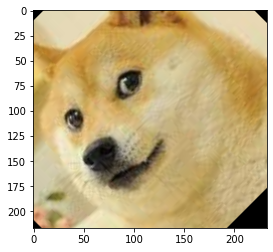

In [36]:
plt.imshow(img_rotated)
plt.show()

Image Translation and Edge detection :-

In [37]:
matrix2 = np.float32([[1,0,60],[0,1,30]])


In [38]:
matrix2

array([[ 1.,  0., 60.],
       [ 0.,  1., 30.]], dtype=float32)

In [39]:
img_translated = cv2.warpAffine(img_rgb, matrix2, (cols,rows) )

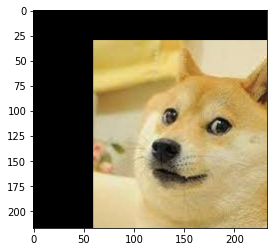

In [40]:
plt.imshow(img_translated)

In [41]:
matrix3 = np.float32([[1,0.2,-50],[0,1,-30]])
img_translated = cv2.warpAffine(img_rgb, matrix3, (cols,rows) )

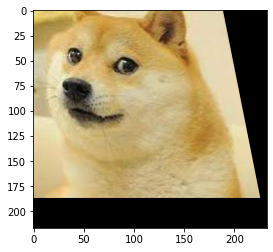

In [42]:
plt.imshow(img_translated)

Edge Detection :

One method : Canny Edge Detection algo

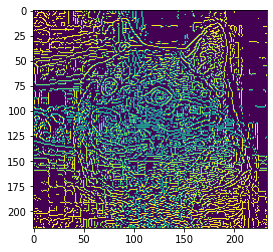

In [43]:
img4= cv2.Canny(img_rgb, 10, 10)
plt.imshow(img4)

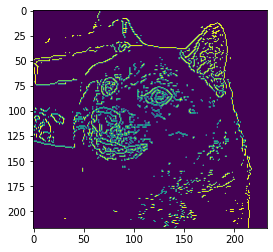

In [44]:
img5 = cv2.Canny(img_rgb, 100,100)
plt.imshow(img5)

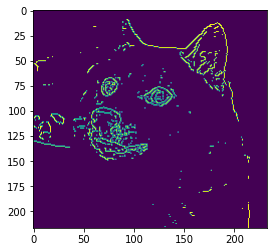

In [45]:
img5 = cv2.Canny(img_rgb, 150,150)
plt.imshow(img5)

# Reading Video from Camera :

In [46]:
import cv2

In [47]:
# 0 : Primary or Front Web camera
# 2 for secondary web camera
#3 : for tertiary and like that 
cam = cv2.VideoCapture(0)

#Here, if it is able to read the cam then "ret" variable will be True else it will be False
# and If it is able to read then it will return you the frames.
while True:
    ret, frame = cam.read()
    
    if ret == False:
        continue
    
    cv2.imshow("my frame", frame)
# I want to wait for 1 milli second after each frame . i.e,
# if It is not getting any frame after 1 millisecond, then I need to move to next frame but I will wait till 1 millisecond 
# for 1 frame, So
    cv2.waitKey(1)
# cv2.waitKey(1) actually wait for 1 millisecond for user to press any key(Or specific key) for stop 
# and it will returns the ASCII alue of the key which you press,  
# 0xFF is like the 32 bit number in hexadecimal (Not sure)
# So,
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break

cam.release()
cv2.destroyAllWindows()

#  this will turn on the web cam and will not turn off automatically,
# To turn off , i need to force stop the web cam and also the kernel will die ,
# So, to terminate the web cam,

# Face detection Algorithm :

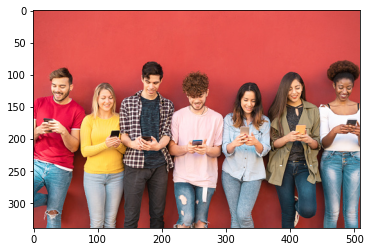

In [56]:
# Template matching, Sliding Window Methos using harrcascade github opencv xml file.
# import cv2
# import matplotlib.pyplot as plt
gp_photo= plt.imread("./groupphoto.jpg")
plt.imshow(gp_photo)
plt.show()

In [66]:
# cv2.CascadeClassifier() is a class/function/file which will load the detector model

detector = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")

# detector = cv2.CascadeClassifier('./harrcascade_frontalface_default.xml')

In [67]:
all_faces = detector.detectMultiScale(gp_photo)

In [68]:
all_faces.shape

(4, 4)

Here, there will be always 4 colums and they are (x, y , width, height ) from the starting pixel of an face detected

In [70]:
all_faces

array([[ 99, 125,  30,  30],
       [321, 129,  30,  30],
       [ 23, 106,  32,  32],
       [391, 110,  31,  31]])

In [71]:
x, y, w, h = all_faces[0]

To create a rectangle around the face, cv2.rectangle() will require source_image, point1 , point 2 corodinates and other things and color in form of RGB tuple.

Here, point1 is the left-top and point2 is right-bottom in form of coordinates.


In [73]:
new_gp_photo= cv2.rectangle(gp_photo,(x,y),(x+w,y+h),  (0,0,0))

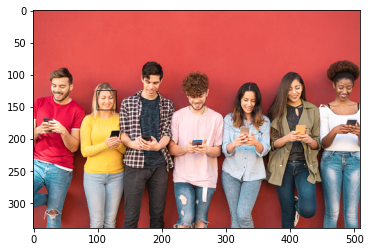

In [74]:
plt.imshow(new_gp_photo)

In [75]:
#For all the faces:
for face in all_faces:
    x,y,w,h = face
    img_new = cv2.rectangle(gp_photo,(x,y),(x+w,y+h),  (0,0,0))

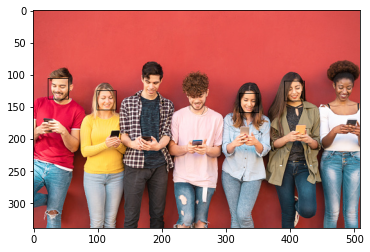

In [76]:
plt.imshow(img_new)
plt.show()

Now, lets improve our detection :-

Scale factor : It defines that how much your image size should reduce after each iteartion so that it is capable of finding better results. Usually, 1.2 or 1.3 is considered a good factor.

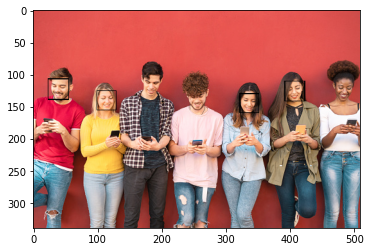

In [77]:
all_faces = detector.detectMultiScale(gp_photo,1.2, 4 )
x, y, w, h = all_faces[0]
new_gp_photo= cv2.rectangle(gp_photo,(x,y),(x+w,y+h),  (0,0,0))
plt.imshow(new_gp_photo)

#For all the faces:
for face in all_faces:
    x,y,w,h = face
    img_new = cv2.rectangle(gp_photo,(x,y),(x+w,y+h),  (0,0,0))
    
plt.imshow(img_new)
plt.show()

# Face Detection in Real Time :-

In [78]:
import cv2

In [79]:
cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')


<CascadeClassifier 000002063FF570F0>

In [89]:
cam2 = cv2.VideoCapture(0)

while True:
    ret, frame2 = cam2.read()
    
    if ret == False:
        continue
    all_faces2 = detector.detectMultiScale(frame2, 1.2, 4)
    
    for face in all_faces2:
        x,y,w,h = face
        my_frame2 = cv2.rectangle(frame2, (x,y), (x+w, y+h), (255,0,0), 6)

# You will notice here that, though the color code given in above line is for Red, but the rectangle in real time video face detection
# is off blue color , because openCV works in BGR rather RGB.
    #This will show the frame :-
    cv2.imshow("Face Detection", frame2)
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed ==  ord('q'):
        break

cam2.release()
cv2.destroyAllWindows()

# Collage making :-

In [90]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [93]:
img1 = plt.imread("./img1.jpg")
img2 = plt.imread("./img2.jpg")
img3 = plt.imread("./img3.jpg")
img4 = plt.imread("./img4.jpg")
img5 = plt.imread("./img5.jpeg")
#5th image is jpeg



Since images are of different sizes so, first resize all to let say (200*200) size

In [94]:
img1 = cv2.resize(img1, (200,200))
img2 = cv2.resize(img2, (200,200))
img3 = cv2.resize(img3, (200,200))
img4 = cv2.resize(img4, (200,200))
img5 = cv2.resize(img5, (100,100))


Lets create a complete black image of required size onto which we will overwrite these images.

In [95]:
final_img = np.zeros((430,430,3), dtype = 'uint8')


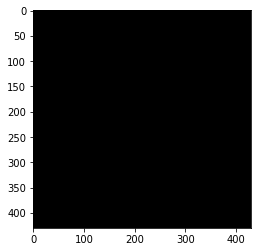

In [96]:
plt.imshow(final_img)
plt.show()

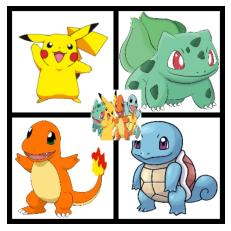

In [100]:
final_img[10:210, 10:210, : ] = img1
# here, first input : rows from and to, second, cols ,from and to and third channel
final_img[10:210, 220:420, : ] = img2
final_img[220:420, 10:210, : ] = img3
final_img[220:420, 220:420, : ] = img4
final_img[165:265, 165:265, :] = img5

plt.imshow(final_img)
plt.axis('off')
plt.show()

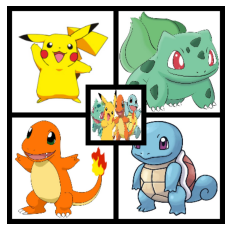

In [109]:
# Mistake :- final_img[155:165, 155:275, :] = np.zeros((10,120),(0,0,0))

final_img[155:165, 155:275, :] = np.zeros((10,120,3), dtype = 'uint8')
final_img[165:265, 155:165, :] = np.zeros((100,10,3), dtype = 'uint8')
final_img[265:275, 155:275, :] = np.zeros((10,120,3), dtype = 'uint8')
final_img[165:265, 265:275, :] = np.zeros((100,10,3), dtype = 'uint8')
plt.imshow(final_img)
plt.axis('off')
plt.show()
plt.imsave( "./final_collage_img.jpeg", final_img)

# Smile Detection :

In [111]:
import cv2

In [112]:
smile_detector = cv2.CascadeClassifier('./haarcascade_smile.xml')

In [114]:
cam3 = cv2.VideoCapture(0)
while True:
    ret, frame3 = cam3.read()
     
    if ret == False:
        continue
    all_smiles = smile_detector.detectMultiScale(frame3, 1.4, 60)
    
    for smile in all_smiles:
        x,y,w,h = smile
        cv2.rectangle == (frame3, (x,y), (x+w,y+h), (255,0,0), 2)
        
    cv2.imshow("Smile Detector", frame3)
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break
    

cam3.release()
cv2.destroyAllWindows()


You will notice that it is detecting multiple rectangles so, If you want just one rectangle to show ets say the biggest one, sFor that :

In [115]:
cam3 = cv2.VideoCapture(0)
while True:
    ret, frame3 = cam3.read()
     
    if ret == False:
        continue
    all_smiles = smile_detector.detectMultiScale(frame3, 1.4, 60)
    
    # In the below line, s is each of (x,y,w,h) and s[-1]*s[-2] is actually represening areas of rectangles.And So we are sorting areas of rectangle
    # to say which is smaller or which is larger
    sorted_smile = sorted(all_smiles, key = lambda s: s[-1]*s[-2])
    if sorted_smile:
        #x,y,w,h = smile
        # Samll modification to the above line :-
        x,y,w,h = sorted_smile[0]
        cv2.rectangle(frame, (x,y),(x+w,y+h), (255,0,0), 2)
        
    
    for smile in all_smiles:
        x,y,w,h = smile
        cv2.rectangle == (frame3, (x,y), (x+w,y+h), (255,0,0), 2)
        
    cv2.imshow("Smile Detector", frame3)
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break
    

cam3.release()
cv2.destroyAllWindows()
